## Lab Notebook - Rift Inversion Project ##
This Jupyter notebooks serves as a record of modeling runs done on Stampede2 as part of the rift inversion project. Each cell includes a note of the current modeling goal and the code to generate the resulting models, as well as a report on the model results.

__NOTE__: Never run all cells, model inputs are designed to be temporary

In [1]:
import ripropagate

# Key function: generate
# Parameters in generate: lthick,evel,etime,output,ver,soft,shell,file

## 2/1/2022 ##
* Need to find out the minimum resolution needed to have robust model results. Going to try a few different things
* First, model at 400 km depth with 1 km resolution throughout
* Second, model at 600 km depth with AMR
* Third, model at 600 km depth with 1 km resolution throughout

* Because these models are slow, increasing the number of nodes assuming scaling tests will help, at least for the inversion phase
* Scaling tests indicated that 2-3 nodes effectively scale runtimes, so running these models with 2 nodes

(array([[      0.,       0.,       0., ...,       0.,       0.,       0.],
        [   2000.,    2000.,    2000., ...,    2000.,    2000.,    2000.],
        [   4000.,    4000.,    4000., ...,    4000.,    4000.,    4000.],
        ...,
        [ 996000.,  996000.,  996000., ...,  996000.,  996000.,  996000.],
        [ 998000.,  998000.,  998000., ...,  998000.,  998000.,  998000.],
        [1000000., 1000000., 1000000., ..., 1000000., 1000000., 1000000.]]),
 array([[     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        ...,
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.],
        [     0.,   2000.,   4000., ..., 596000., 598000., 600000.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0.

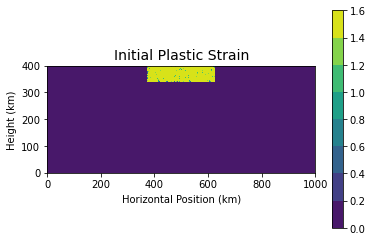

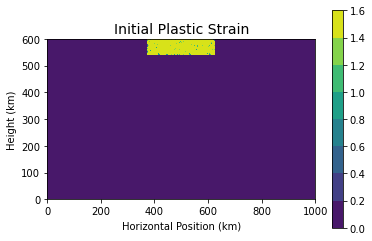

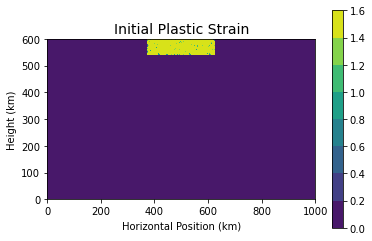

In [2]:
ripropagate.generate(etime=12.5,evel=1,output='./020122_ri_a',file='ri_base.prm',soft=0.375,depth=400,shell='run_base_nal.sh',
                    ver='a',nodes=2)
ripropagate.comp_ascii(depth=400,output='./020122_ri_a')

ripropagate.generate(etime=12.5,evel=1,output='./020122_ri_b',file='ri_base_600_amr.prm',soft=0.375,depth=600,p1=400,p2=200,
                     shell='run_base_nal.sh',ver='b',nodes=2)
ripropagate.generate(etime=12.5,evel=1,output='./020122_ri_c',file='ri_base_600.prm',soft=0.375,depth=600,p1=400,p2=200,
                     shell='run_base_nal.sh',ver='c',nodes=2)
ripropagate.comp_ascii(depth=600,output='./020122_ri_b')
ripropagate.comp_ascii(depth=600,output='./020122_ri_c')